In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [74]:
#https://datos.gob.mx/busca/dataset/cancer-de-la-mujer-sicam-cancer-de-mama
path = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\Mastografías 2017.csv'

dataframe = pd.read_csv(path, encoding='latin', error_bad_lines=False)
dataframe.head()

,Clave Entidad,Entidad,Clave Jurisdicción,Jurisdicción,Clave Municipio,Municipio,Edad,Fecha Toma Masto,Fecha Interpretación Masto,Resultado
0,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,Altamente Sugestiva a Malignidad
1,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,Altamente Sugestiva a Malignidad
2,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,Probablemente Benigna
3,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,Evaluación Adicional
4,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,Altamente Sugestiva a Malignidad


In [75]:
dataframe.describe()

,Clave Entidad,Clave Jurisdicción,Clave Municipio,Edad
count,855017.000000,855017.000000,855017.000000,855017.000000
mean,16.195659,5.270046,41.729113,50.756363
std,7.068885,5.228078,39.831590,7.558090
min,1.000000,1.000000,1.000000,25.000000
25%,11.000000,1.000000,9.000000,44.000000
50%,15.000000,4.000000,30.000000,50.000000
75%,21.000000,7.000000,67.000000,56.000000
max,32.000000,71.000000,553.000000,69.000000


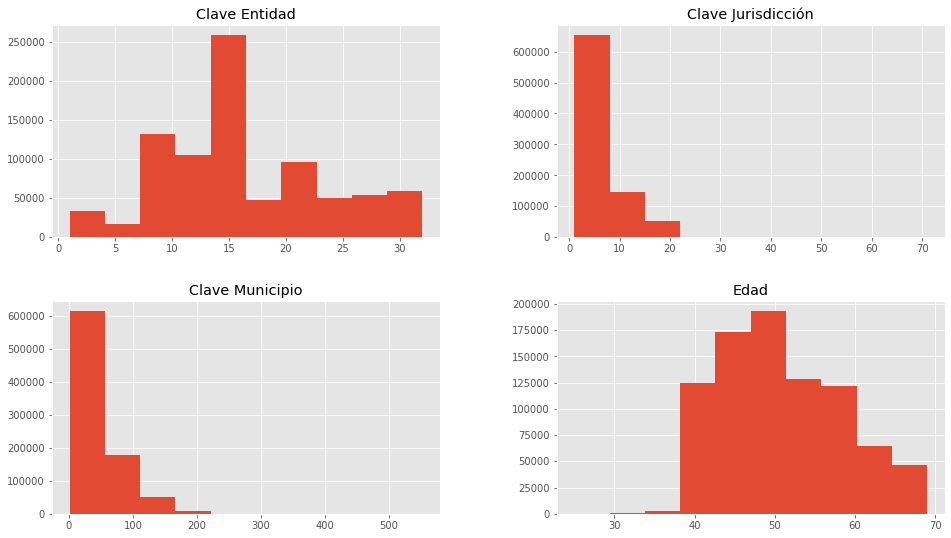

In [76]:
dataframe.hist()
plt.show()

In [78]:
print(dataframe.groupby('Edad').size())

Edad
25       27
26       32
27       25
28       51
29       75
30       85
31      100
32      103
33      164
34      221
35      334
36      390
37      661
38      960
39     2379
40    36915
41    41762
42    43138
43    43768
44    44226
45    43613
46    41726
47    40930
48    39453
49    38543
50    37858
51    36241
52    34873
53    33194
54    30846
55    29074
56    27793
57    26846
58    24466
59    22197
60    20772
61    18743
62    17404
63    15397
64    13505
65    11904
66    10629
67     9248
68     7890
69     6456
dtype: int64


C:\Users\hades\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


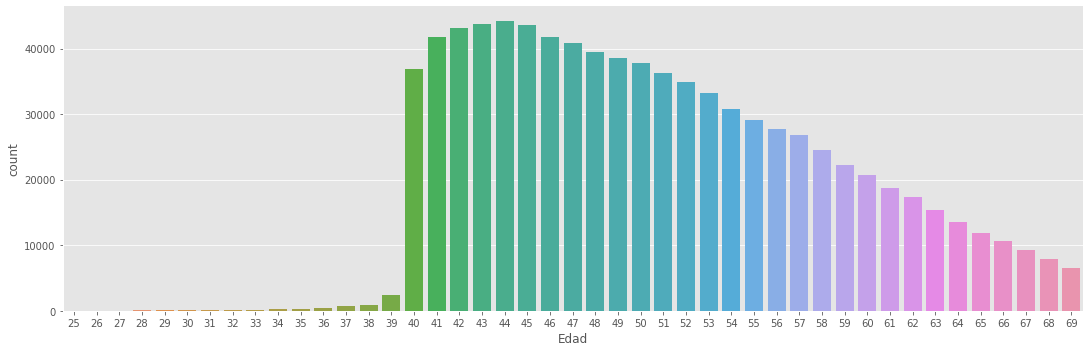

In [79]:
sb.factorplot('Edad',data=dataframe,kind="count", aspect=3)

In [84]:
list(dataframe['Resultado'].unique())

['Altamente Sugestiva a Malignidad',
 'Probablemente Benigna',
 'Evaluación Adicional',
 'Benigna',
 'Anormalidad Sospechosa',
 'Riesgo Intermedio de Malignidad',
 'Baja Sospecha de Malignidad',
 'Negativa',
 'Riesgo Moderado de Malignidad']

In [85]:
keys = list(df['Resultado'].unique())
vals = range(1,10)
act = dict(zip(keys, vals))
act

{'Altamente Sugestiva a Malignidad': 1,
 'Probablemente Benigna': 2,
 'Evaluación Adicional': 3,
 'Benigna': 4,
 'Anormalidad Sospechosa': 5,
 'Riesgo Intermedio de Malignidad': 6,
 'Baja Sospecha de Malignidad': 7,
 'Negativa': 8,
 'Riesgo Moderado de Malignidad': 9}

In [86]:
df_copy = df.copy()
df_copy.head()

,Clave Entidad,Entidad,Clave Jurisdicción,Jurisdicción,Clave Municipio,Municipio,Edad,Fecha Toma Masto,Fecha Interpretación Masto,Resultado
0,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,Altamente Sugestiva a Malignidad
1,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,Altamente Sugestiva a Malignidad
2,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,Probablemente Benigna
3,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,Evaluación Adicional
4,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,Altamente Sugestiva a Malignidad


In [87]:
df_copy['Resultado'] = df['Resultado'].map(act)
df_copy.head()

,Clave Entidad,Entidad,Clave Jurisdicción,Jurisdicción,Clave Municipio,Municipio,Edad,Fecha Toma Masto,Fecha Interpretación Masto,Resultado
0,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,1
1,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,1
2,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,2
3,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,3
4,1,Aguascalientes,1,Aguascalientes,1,AGUASCALIENTES,57,00:00.0,00:00.0,1


In [88]:
list(df_copy['Resultado'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9]

C:\Users\hades\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


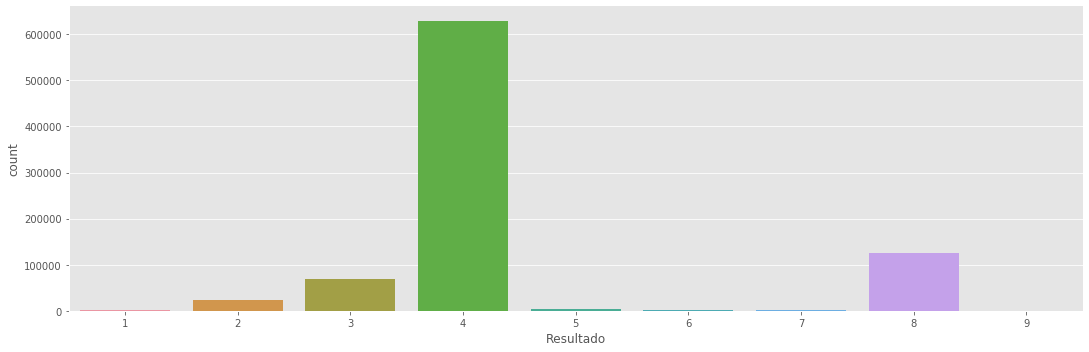

In [89]:
sb.factorplot('Resultado',data=df_copy,kind="count", aspect=3)

In [91]:

X = df_copy[['Edad','Clave Municipio']].values
y = df_copy['Resultado'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [92]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.72
Accuracy of K-NN classifier on test set: 0.72


In [93]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[     0      3      9    316      0      0      0     13      0]
 [     1     45    191   5352      0      0      0    214      0]
 [     1     85   1375  15307      1      0      0    737      0]
 [     1    504   3296 147791      1      0      0   5599      0]
 [     0      3     22    809      0      0      0     26      0]
 [     0      0     10    146      0      0      0      6      0]
 [     0      1     10    185      0      0      0      4      0]
 [     5     97   1066  26707      0      0      0   3747      0]
 [     0      0      0     66      0      0      0      3      0]]


C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       341
           2       0.06      0.01      0.01      5803
           3       0.23      0.08      0.12     17506
           4       0.75      0.94      0.84    157192
           5       0.00      0.00      0.00       860
           6       0.00      0.00      0.00       162
           7       0.00      0.00      0.00       200
           8       0.36      0.12      0.18     31622
           9       0.00      0.00      0.00        69

    accuracy                           0.72    213755
   macro avg       0.16      0.13      0.13    213755
weighted avg       0.63      0.72      0.65    213755

